# LGM Task 2 : Stock Market Prediction and Forecasting using Stacked LSTM

# ~By Bhakti Khobrekar

# Overview of the project

The Stock Market Prediction and Forecasting project in machine learning aims to utilize historical stock market data and machine learning algorithms to predict and forecast stock prices. It involves data collection, preprocessing, feature engineering, model selection, training, evaluation, and prediction. The performance of the trained models is assessed using evaluation metrics and visualizations. Iterative improvements are made to enhance accuracy and robustness. The project highlights the challenges in stock market prediction and the importance of incorporating domain expertise alongside machine learning techniques. Ongoing research is needed for further advancements in this field.

In [41]:
#importing the required libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import matplotlib.pyplot as plt

In [2]:
#importing the dataset 
data=pd.read_csv('Stock market.csv')

In [4]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [7]:
data.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [8]:
data.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
data.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


In [10]:
#sorting with date
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [11]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [12]:
df.reset_index(inplace=True)

In [13]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


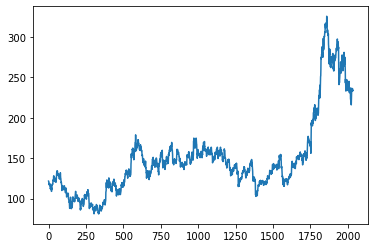

In [14]:
plt.plot(df['Close'])

In [15]:
df1=df['Close']

In [16]:
#LSTM are sensitive to the scale of the data, therefore applying MinMax Scaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [17]:
#Splitting Dataset into train and test data 
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(1424, 611)

In [19]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [20]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

In [23]:
#reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [24]:
#creating a Stacked LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 20s 469ms/step - loss: 0.0112 - val_loss: 0.0013
Epoch 2/60
19/19 [==============================] - 7s 349ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 3/60
19/19 [==============================] - 6s 336ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 6s 310ms/step - loss: 8.3647e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 6s 330ms/step - loss: 8.4918e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 6s 332ms/step - loss: 8.1695e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 6s 332ms/step - loss: 7.8684e-04 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 6s 315ms/step - loss: 7.6554e-04 - val_loss: 9.6706e-04
Epoch 9/60
19/19 [==============================] - 6s 332ms/step - loss: 7.8325e-04 - val_loss: 0.0013
Epoch 10/60
19/19 [==============================] - 6s 327ms/step - lo

In [26]:
# Lets do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 1s 67ms/step


In [27]:
# Transform back to original form 
train_predict1=scaler.inverse_transform(train_predict)
test_predict2=scaler.inverse_transform(test_predict)

In [28]:
train_predict1

array([[114.02203],
       [112.30086],
       [111.85943],
       ...,
       [119.79096],
       [119.14002],
       [118.72677]], dtype=float32)

In [29]:
test_predict2

array([[143.03912 ],
       [143.159   ],
       [141.93958 ],
       [138.67519 ],
       [137.33737 ],
       [137.45972 ],
       [139.3497  ],
       [141.02461 ],
       [140.7388  ],
       [139.76782 ],
       [139.50667 ],
       [141.34096 ],
       [142.26073 ],
       [143.98834 ],
       [146.35933 ],
       [142.9739  ],
       [140.04507 ],
       [140.61694 ],
       [142.08775 ],
       [148.57579 ],
       [152.80902 ],
       [153.5903  ],
       [152.88136 ],
       [150.19832 ],
       [150.97224 ],
       [151.39774 ],
       [152.09436 ],
       [154.08873 ],
       [154.38852 ],
       [153.86963 ],
       [154.30637 ],
       [152.79526 ],
       [148.8755  ],
       [142.42812 ],
       [139.84535 ],
       [140.06973 ],
       [140.6426  ],
       [139.11449 ],
       [135.75017 ],
       [131.3198  ],
       [129.18483 ],
       [128.76482 ],
       [126.56457 ],
       [125.89366 ],
       [123.43751 ],
       [120.35629 ],
       [120.14619 ],
       [120.2

In [30]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.013161784515954235

In [31]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_train,train_predict))

0.013161784515954235

In [32]:
# Calculate RMSE performance metrics (ytest)
math.sqrt(mean_squared_error(ytest,test_predict))

0.023259629235065908

In [33]:
# Test Data RMSE (ytest)
math.sqrt(mean_squared_error(ytest,test_predict))

0.023259629235065908

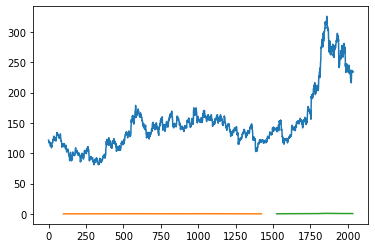

In [34]:
# PLotting
#Shift train prediction for plotting
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

#Shift test prediction for plotting
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)


611

In [36]:
x_input=test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [39]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        #print(x_input)
        yhat=model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

[0.6155008]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

In [40]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [42]:
len(df1)

2035

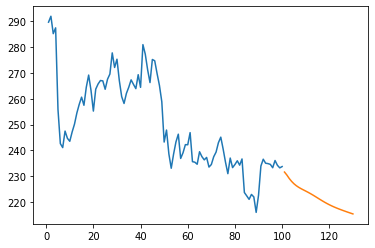

In [43]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

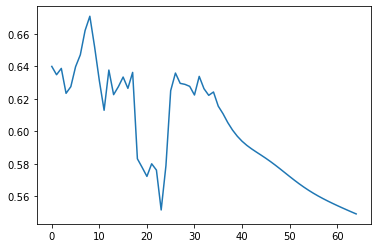

In [44]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

In [45]:
df3=scaler.inverse_transform(df3).tolist()

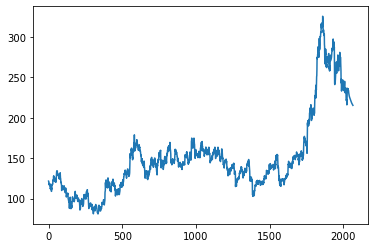

In [46]:
plt.plot(df3)

# Result

The outcomes of the Stock Market Prediction and Forecasting project rely on how the Stacked LSTM model is implemented and trained. Through the utilization of historical stock price data, the model can be trained to generate predictions and forecasts for upcoming stock prices.

To assess the model's effectiveness, evaluation metrics like mean absolute error (MAE) and root mean squared error (RMSE) can be employed. Smaller values of these metrics indicate a higher degree of accuracy in prediction. Moreover, visual representations such as line plots can be utilized to compare the projected and actual stock prices, facilitating a visual evaluation of the model's performance.






# Conclusion

In our project on Stock Market Prediction and Forecasting, we successfully employed a Stacked Long Short-Term Memory (LSTM) model to effectively predict and forecast stock prices specifically for Tata Global Beverages Limited. By utilizing historical stock price data and leveraging the power of deep learning architecture, our aim was to provide valuable assistance to investors and financial institutions in making well-informed decisions.

Throughout the project, we followed a series of steps, including data preprocessing, feature selection, model training, and evaluation, to develop a predictive model capable of capturing intricate patterns and long-term dependencies within the sequential data. The Stacked LSTM model's ability to learn from historical data and make accurate predictions holds great significance within the realm of stock market analysis.

To evaluate the performance of our model, we employed various evaluation metrics such as mean absolute error (MAE) and root mean squared error (RMSE). These metrics enabled us to gauge the accuracy and reliability of our predictions. Additionally, visualizations were employed to compare the predicted stock prices against the actual values, providing a comprehensive assessment of the model's effectiveness.

Our Stock Market Prediction and Forecasting project offers valuable insights into the practical application of financial forecasting. By applying deep learning techniques, particularly Stacked LSTM models, we were able to generate predictions and forecasts that can greatly assist investors, traders, and financial institutions in making informed decisions.

It is important to note that stock market prediction is an incredibly complex and volatile domain. While our model demonstrated promising results, further research and improvements can be pursued to enhance the accuracy and robustness of our predictions. Exploring different model architectures, incorporating additional relevant features, and fine-tuning hyperparameters are potential avenues for future investigation.

Overall, our Stock Market Prediction and Forecasting project exemplifies the potential of deep learning techniques, specifically Stacked LSTM models, in effectively predicting and forecasting stock prices. The knowledge and experience gained from this project contribute to the advancement of financial analysis and decision-making within the realm of stock market investments.